In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [4]:
sport_cars = pd.read_csv("/content/drive/MyDrive/sport_cars_characteristics.csv")

## Датасет взят отсюда: https://www.kaggle.com/datasets/joanpau/cars-df?resource=download

In [5]:
sport_cars

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Nissan Titan King Cab XE,False,False,False,False,True,True,False,26650,24926,5.6,8,305,14.0,18.0,5287.0,140.0,NaN,NaN
424,Subaru Baja,False,False,False,False,True,True,False,24520,22304,2.5,4,165,21.0,28.0,3485.0,104.0,NaN,NaN
425,Toyota Tacoma,False,False,False,False,True,False,True,12800,11879,2.4,4,142,22.0,27.0,2750.0,103.0,NaN,NaN
426,Toyota Tundra Regular Cab V6,False,False,False,False,True,False,True,16495,14978,3.4,6,190,16.0,20.0,3925.0,128.0,NaN,NaN


In [6]:
print(sport_cars.columns.tolist())

['name', 'sports_car', 'suv', 'wagon', 'minivan', 'pickup', 'all_wheel', 'rear_wheel', 'msrp', 'dealer_cost', 'eng_size', 'ncyl', 'horsepwr', 'city_mpg', 'hwy_mpg', 'weight', 'wheel_base', 'length', 'width']


In [7]:
#  Для начала необходимо избавиться от записей с недействительными значений

sport_cars_2 = sport_cars.copy()

sport_cars_2 = sport_cars_2.dropna()

In [8]:
sport_cars_2

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Oldsmobile Silhouette GL,False,False,False,True,False,False,False,28790,26120,3.4,6,185,19.0,26.0,3948.0,120.0,201.0,72.0
400,Pontiac Montana,False,False,False,True,False,False,False,23845,21644,3.4,6,185,19.0,26.0,3803.0,112.0,187.0,72.0
401,Pontiac Montana EWB,False,False,False,True,False,True,False,31370,28454,3.4,6,185,18.0,24.0,4431.0,121.0,201.0,72.0
402,Toyota Sienna CE,False,False,False,True,False,False,False,23495,21198,3.3,6,230,19.0,27.0,4120.0,119.0,200.0,77.0


# Переведём значения из плавающих чисел в целые 

In [9]:
city_mpg = sport_cars_2['city_mpg'].tolist()
hwy_mpg = sport_cars_2['hwy_mpg'].tolist()
weight = sport_cars_2['weight'].tolist()
wheel_base = sport_cars_2['wheel_base'].tolist()
length = sport_cars_2['length'].tolist()
width = sport_cars_2['width'].tolist()

city_mpg_2 = []
hwy_mpg_2 = []
weight_2 = []
wheel_base_2 = []
length_2 = []
width_2 = []

for i in city_mpg:
  city_mpg_2.append(int(i))

for i in hwy_mpg:
  hwy_mpg_2.append(int(i))

for i in weight:
  weight_2.append(int(i))

for i in wheel_base:
  wheel_base_2.append(int(i))

for i in length:
  length_2.append(int(i))

for i in width:
  width_2.append(int(i))


sport_cars_2['city_mpg'] = city_mpg_2
sport_cars_2['hwy_mpg'] = hwy_mpg_2
sport_cars_2['weight'] = weight_2
sport_cars_2['wheel_base'] = wheel_base_2
sport_cars_2['length'] = length_2
sport_cars_2['width'] = width_2

In [10]:
# готов

sport_cars_2

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28,34,2370,98,167,66
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28,34,2348,98,153,66
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26,37,2617,104,183,69
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26,37,2676,104,183,68
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26,37,2617,104,183,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Oldsmobile Silhouette GL,False,False,False,True,False,False,False,28790,26120,3.4,6,185,19,26,3948,120,201,72
400,Pontiac Montana,False,False,False,True,False,False,False,23845,21644,3.4,6,185,19,26,3803,112,187,72
401,Pontiac Montana EWB,False,False,False,True,False,True,False,31370,28454,3.4,6,185,18,24,4431,121,201,72
402,Toyota Sienna CE,False,False,False,True,False,False,False,23495,21198,3.3,6,230,19,27,4120,119,200,77


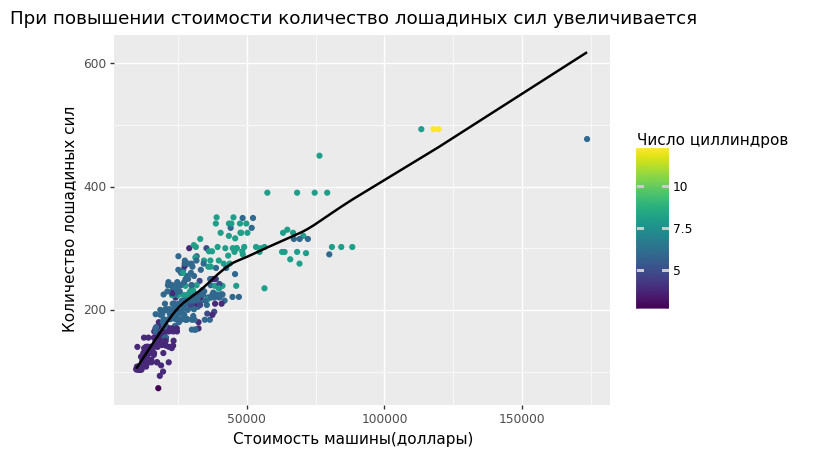

<ggplot: (8765749886717)>

In [11]:
# Чтобы проверить, что всё работает, сделаем график
ggplot(data=sport_cars_2, mapping = aes(x='dealer_cost', y='horsepwr', color='ncyl')) + geom_point() + geom_smooth(mapping=aes(x='dealer_cost', y='horsepwr', group=1), se=False)+\
labs(
    x="Стоимость машины(доллары)",
     y="Количество лошадиных сил",
     colour="Число циллиндров",
     title="При повышении стоимости количество лошадиных сил увеличивается")